# Exploratory Data Analysis

In [14]:
import pandas as pd
import numpy as np
#import keras
import seaborn as sn
import os
import time
import matplotlib.pyplot as plt

In [15]:
# Set the working directory & Read the data
os.chdir("C:\\Sunder\\DataScience\\MachineLearning\\Projects\\CreditCardFraudDetection")
data = pd.read_csv("creditcard.csv")

In [16]:
data.shape

(284807, 31)

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [18]:
# Normalize the amount
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [19]:
# Drop the Time
data = data.drop(['Time'],axis=1)

In [20]:
data.shape

(284807, 30)

In [21]:
# Separate the dependent and independent variables
X = data.iloc[:, data.columns != 'Class'] # All Independent Variables
y = data.iloc[:, data.columns == 'Class'] # Dependent Variable

In [22]:
X.shape

(284807, 29)

In [23]:
y.shape

(284807, 1)

In [24]:
# Split the Data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


# Model Building

## Random Forest (Model-1)

In [43]:
# Random Forest (Model-1)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,verbose=2)
random_forest.fit(X_train,y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [20]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


0.9995318516437859

In [44]:
# Evaluate the metrics
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score %0.3f " % accuracy_score(y_test, y_pred))
print("Precision Score %0.3f " % precision_score(y_test, y_pred)) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_test, y_pred)) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_test, y_pred))

Accuracy Score 0.999 
Precision Score 0.782 
Recall Score 0.755 
F1 Score 0.768 


Test Data Accuracy: 0.9992


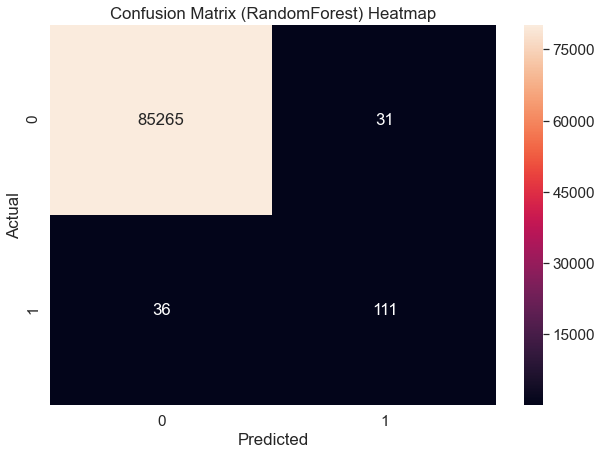

In [46]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (RandomForest) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Decision Trees (Model-2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9992743700478681

Accuracy Score 0.999 
Precision Score 0.806 
Recall Score 0.762 
F1 Score 0.783 
Test Data Accuracy: 0.9993


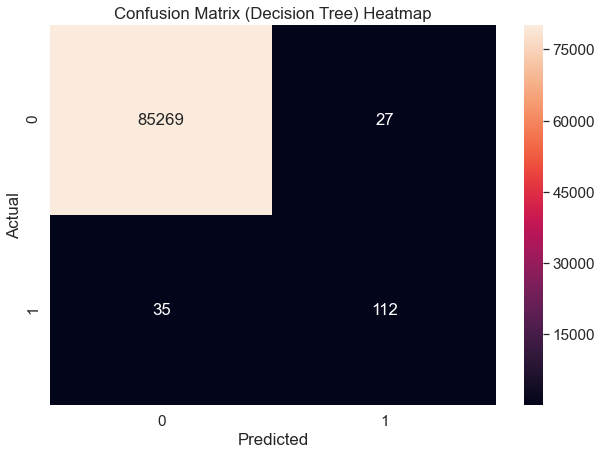

In [49]:
# Evaluate the metrics & Plotting the confusion matrix
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score %0.3f " % accuracy_score(y_test, y_pred))
print("Precision Score %0.3f " % precision_score(y_test, y_pred)) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_test, y_pred)) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_test, y_pred))
# Plotting the confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (Decision Tree) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [41]:
y_test['Class'].value_counts()

0    85296
1      147
Name: Class, dtype: int64

## Deep Neural Network (Model-3)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
# Convert the Train and Test data into an np array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
neural_model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
neural_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [30]:
# Training the Neural network model
neural_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
neural_model.fit(X_train,y_train,batch_size=15,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 16s 83us/step - loss: 0.0097 - accuracy: 0.9989
Epoch 2/5
199364/199364 [==============================] - 16s 81us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 16s 82us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 17s 83us/step - loss: 0.0037 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 16s 82us/step - loss: 0.0035 - accuracy: 0.9994


In [31]:
score =neural_model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 16us/step


In [32]:
print(score)

[0.004813086159245595, 0.9993562698364258]


In [33]:
# Predict the test data
y_pred =neural_model.predict(X_test)
y_test = pd.DataFrame(y_test)

Accuracy Score 0.999 
Precision Score 0.897 
Recall Score 0.707 
F1 Score 0.791 
Test Data Accuracy: 0.9994


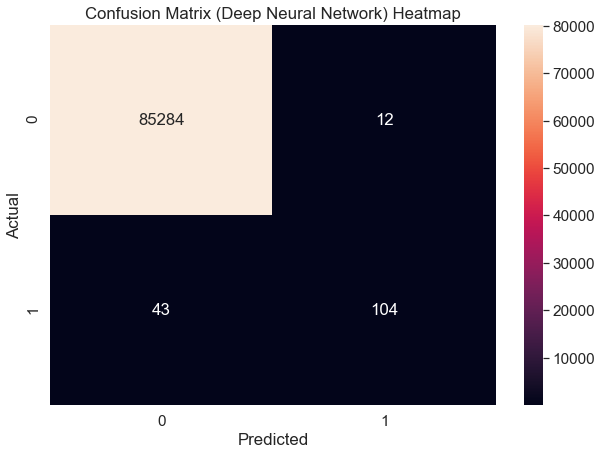

In [34]:
# Evaluate the metrics & Plotting the confusion matrix
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred.round())
print("Accuracy Score %0.3f " % accuracy_score(y_test, y_pred.round()))
print("Precision Score %0.3f " % precision_score(y_test, y_pred.round())) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_test, y_pred.round())) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_test, y_pred.round()))
# Plotting the confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (Deep Neural Network) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred.round()))

In [35]:
# Predict for the entire dataset
y_pred = neural_model.predict(X)
y_expected = pd.DataFrame(y)

Accuracy Score 0.999 
Precision Score 0.891 
Recall Score 0.697 
F1 Score 0.782 
Test Data Accuracy: 0.9993


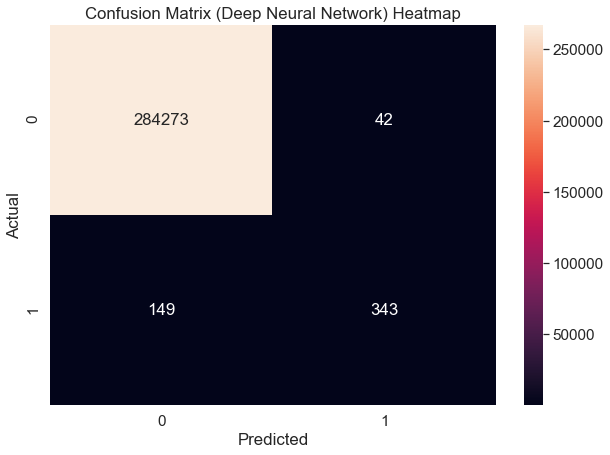

In [36]:
# Calculate the metrics
cm = confusion_matrix(y_expected, y_pred.round())
print("Accuracy Score %0.3f " % accuracy_score(y_expected, y_pred.round()))
print("Precision Score %0.3f " % precision_score(y_expected, y_pred.round())) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_expected, y_pred.round())) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_expected, y_pred.round()))
# Plotting the confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (Deep Neural Network) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_expected, y_pred.round()))

# Undersampling

In [76]:
# Since this is a imbalanced Dataset, we shall undersample the dominant class (0) for a total of the number of records 
# as the number of records for the dwarf class (1 - Fraud transactions)
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [78]:
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [79]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [80]:
# Undersample Data Preparation and split into train and test data
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [83]:
# Model Summary and prediction
neural_model.summary()
neural_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
neural_model.fit(X_train,y_train,batch_size=15,epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [85]:
# Predict the test data (undersampled)
y_pred = neural_model.predict(X_test)
y_expected = pd.DataFrame(y_test)

Accuracy Score 0.959 
Precision Score 0.992 
Recall Score 0.920 
F1 Score 0.955 
Test Data Accuracy: 0.9595


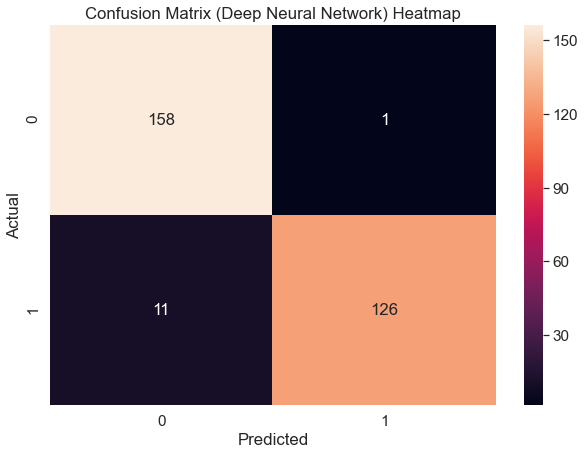

In [86]:
# Calculate the metrics
cm = confusion_matrix(y_expected, y_pred.round())
print("Accuracy Score %0.3f " % accuracy_score(y_expected, y_pred.round()))
print("Precision Score %0.3f " % precision_score(y_expected, y_pred.round())) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_expected, y_pred.round())) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_expected, y_pred.round()))
# Plotting the confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (Deep Neural Network) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_expected, y_pred.round()))

# SMOTE

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)
X_resample.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split

In [41]:
# Split the data into training and test (0.3)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
neural_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
neural_model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 34s 85us/step - loss: 0.0327 - accuracy: 0.9886
Epoch 2/5
398041/398041 [==============================] - 35s 87us/step - loss: 0.0134 - accuracy: 0.9962
Epoch 3/5
398041/398041 [==============================] - 35s 87us/step - loss: 0.0110 - accuracy: 0.9972
Epoch 4/5
398041/398041 [==============================] - 34s 86us/step - loss: 0.0099 - accuracy: 0.9975
Epoch 5/5
398041/398041 [==============================] - 42s 105us/step - loss: 0.0091 - accuracy: 0.9978


In [48]:
# Predict the test data (SMOTE)
y_pred = neural_model.predict(X_test)
y_expected = pd.DataFrame(y_test)

In [49]:
print(y_pred.shape)

(170589, 1)


Accuracy Score 0.998 
Precision Score 0.997 
Recall Score 1.000 
F1 Score 0.998 
Test Data Accuracy: 0.9981652


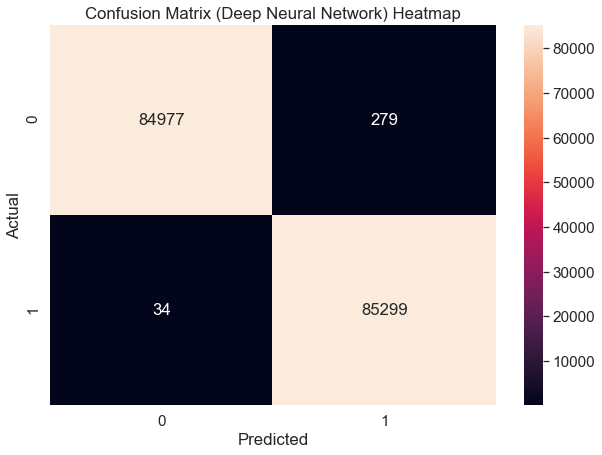

In [52]:
# Calculate the metrics
cm = confusion_matrix(y_expected, y_pred.round())
print("Accuracy Score %0.3f " % accuracy_score(y_expected, y_pred.round()))
print("Precision Score %0.3f " % precision_score(y_expected, y_pred.round())) # tp / (tp + fp)
print("Recall Score %0.3f " % recall_score(y_expected, y_pred.round())) # tp / (tp + fn)
print("F1 Score %0.3f " % f1_score(y_expected, y_pred.round()))
# Plotting the confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True, fmt='g',robust=True)
ax.set(title="Confusion Matrix (Deep Neural Network) Heatmap",
      xlabel="Predicted",
      ylabel="Actual")
print("Test Data Accuracy: %0.7f" % accuracy_score(y_expected, y_pred.round()))